 # Plots for 'Data over the Kamb channel'
 
 ## Plan

1. overview map
2. REMA splodge
3. ApRES plot
4. radar map
3. icesat2 dots
4. a. Icesat2 crosssection lower
4. b. Icesat2 crosssection raise
5. a. Icesat1 and REMA crossections
5. b. other icesat1 and REMA

In [1]:
import rasterio as rio
import rasterio.mask
import fiona
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import os
import sys
import glob
import matplotlib.pyplot as plt
from scipy import interpolate
import xarray as xr
from shapely.geometry import Point, LineString, box
# import hvplot.xarray  # noqa
# import cartopy.crs as crs
# import hvplot.pandas
import tarfile
import matplotlib as mpl

In [2]:
xmin, xmax, ymin, ymax = -382700, -374781.9, -734075.1, -721770.2

# a = 5000

# xmin= xmin- a

# xmax=xmax+ a

# ymin=ymin- a

# ymax = ymax+ a

In [3]:
print(xmin, xmax, ymin, ymax)

-382700 -374781.9 -734075.1 -721770.2


In [4]:
#crop the moa image to larger channel area

# gdal_translate -projwin -392700 -711770.2 -364781.9 -744075.1 -of GTiff /Volumes/arc_02/REMOTE_SENSING/Quantarctica3/Glaciology/MOA/moa125_2009_hp1_v1.1.tif /Volumes/arc_02/REMOTE_SENSING/Quantarctica3/Glaciology/MOA/moa_cropped_KIS2.tif

In [5]:
bbox = box(xmin, xmax, ymin, ymax )

In [6]:
xgrid = np.arange(-382000,-374000,2000)
xgrid

array([-382000, -380000, -378000, -376000])

In [7]:
# Load modis moa

# with rio.open('/Volumes/arc_02/REMOTE_SENSING/Quantarctica3/SatelliteImagery/MODIS/MODIS_Mosaic_siplecoast.tif') as image:
#     extent_moa = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
#     im_moa = image.read(1)
#     window=Window(0, 0, 10000, 10000)
#gdal_translate -projwin -382700.0 -721770.2 -374781.9 -734075.1 -of GTiff /Volumes/arc_02/REMOTE_SENSING/Quantarctica3/Glaciology/MOA/moa125_2009_hp1_v1.1.tif /Volumes/arc_02/REMOTE_SENSING/Quantarctica3/Glaciology/MOA/moa_cropped_channel.tif
with rio.open('/Volumes/arc_02/REMOTE_SENSING/Quantarctica3/Glaciology/MOA/moa125_2009_hp1_v1.1.tif') as image:
    extent_moa = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
    im_moa = image.read(1)

In [13]:
moreleft = 7000
moreup = 2000
moreright = 3000
moredown = 6000
extent_fig = [-392700.0-moreleft, -364825.0+moreright, -743925.0-moredown, -711675.0+moreup]
extent_fig

[-399700.0, -361825.0, -749925.0, -709675.0]

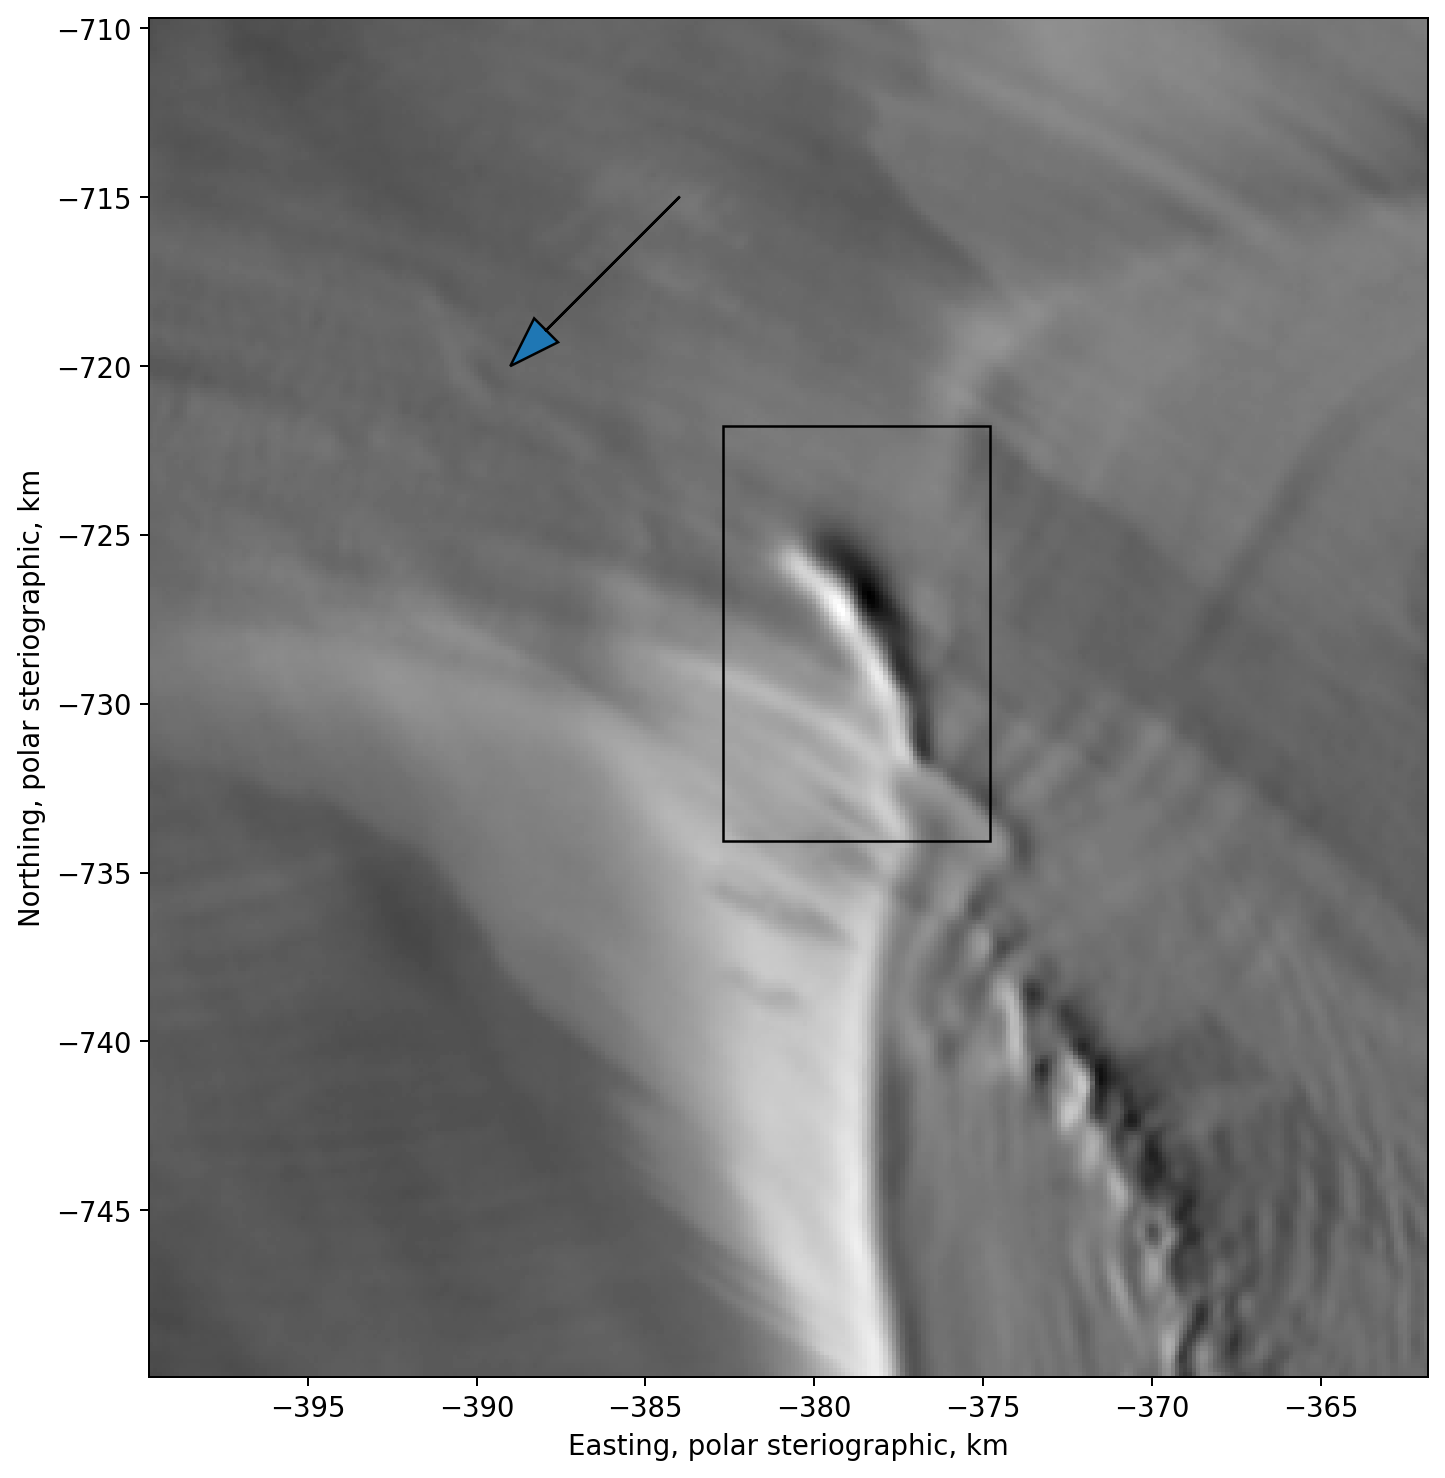

In [14]:
plt.figure(figsize=[10,10],dpi=180)
font = {'size'   : 11}
mpl.rc('font', **font)
plt.imshow(im_moa[::1,::1],extent=np.array(extent_moa)/1000,vmin=15312,vmax=16920,cmap='gist_gray')

#plt.scatter( -388 , -720, s=20000  , facecolors='none', edgecolors='cyan' )
plt.arrow( -384 , -715,-5 ,-5,head_width=1,length_includes_head=True)
plt.xlim([extent_fig[0]/1000, extent_fig[1]/1000])
plt.ylim([extent_fig[2]/1000, extent_fig[3]/1000]) 
# plt.ylim([-740, -710]) 
plt.xlabel('Easting, polar steriographic, km')
plt.ylabel('Northing, polar steriographic, km')
rr =plt.Rectangle((xmin/1000, ymin/1000),
                        (xmax-xmin)/1000, (ymax-ymin)/1000,
                        fc='none',
                        color ='black',
                        linewidth = 1,
#                         linestyle="dotted"
                 )
plt.gca().add_patch(rr)

plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/moa_solo.png')
plt.show()

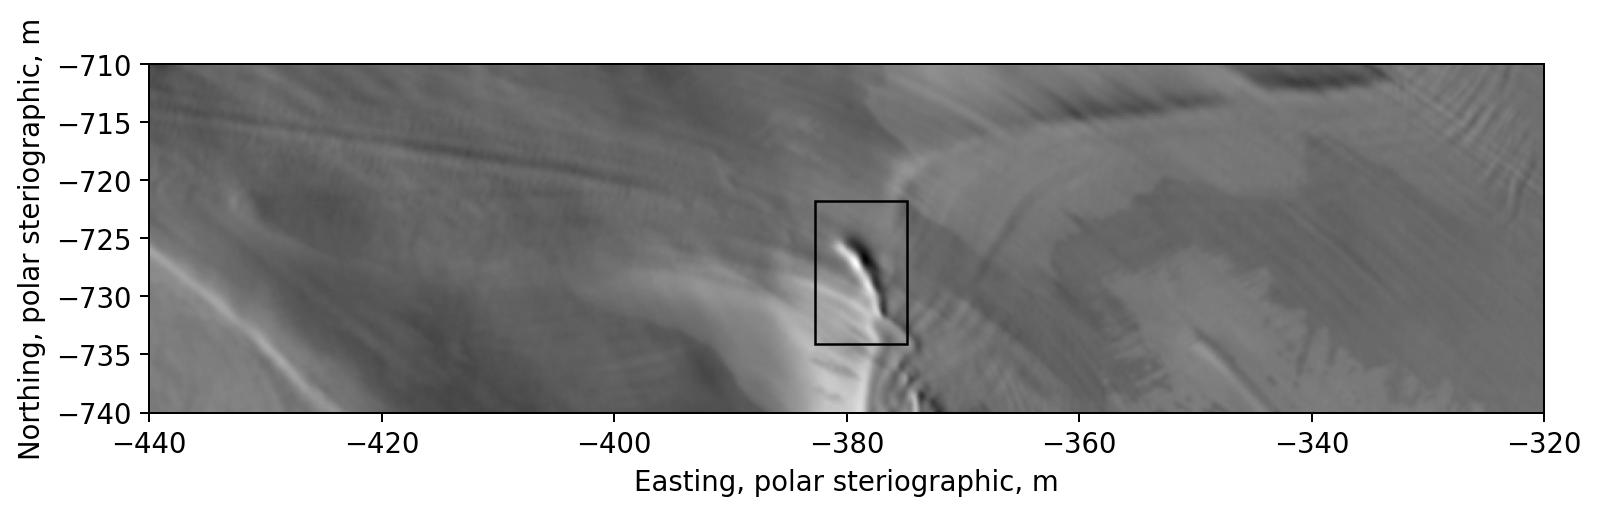

In [10]:
extent_fig = [-440000,-320000,-720000,-650000]
plt.figure(figsize=[10,6],dpi=180)
font = {'size'   : 11}
mpl.rc('font', **font)
plt.imshow(im_moa,extent=np.array(extent_moa)/1000,vmin=15312,vmax=16920,cmap='gist_gray')

#plt.scatter( -388 , -720, s=20000  , facecolors='none', edgecolors='cyan' )
# plt.arrow( -384 , -715,-5 ,-5,head_width=1,length_includes_head=True)
plt.xlim([extent_fig[0]/1000, extent_fig[1]/1000])
plt.ylim([-740, -710]) 
plt.xlabel('Easting, polar steriographic, m')
plt.ylabel('Northing, polar steriographic, m')
rr =plt.Rectangle((xmin/1000, ymin/1000),
                        (xmax-xmin)/1000, (ymax-ymin)/1000,
                        fc='none',
                        color ='black',
                        linewidth = 1,
#                         linestyle="dotted"
                 )
plt.gca().add_patch(rr)

# plt.xlabel('x, Polar Steriographic')
# plt.ylabel('y, Polar Steriographic')
# plt.xticks(xgrid)
# plt.grid()
# plt.legend()
# cb = plt.colorbar()
# cb.set_label('REMA surface, masl')

plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/moa_solo_noarrow.png')
plt.show()

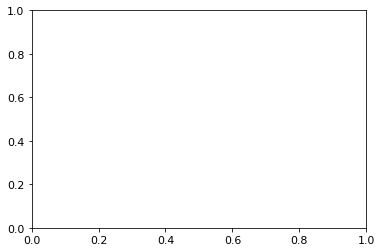

In [15]:
rr =plt.Rectangle((xmin/1000, ymin/1000),
                        (xmax-xmin)/1000, (ymax-ymin)/1000,
                        fc='none',
                        color ='yellow',
                        linewidth = 5,
                        linestyle="dotted")
plt.gca().add_patch(rr)

(0.0, 10.0)

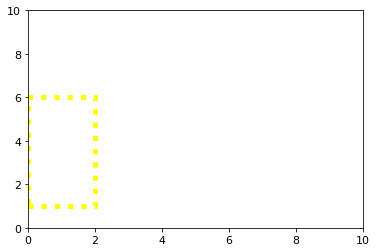

In [17]:
rr =plt.Rectangle((0,1),2,5,
                        fc='none',
                        color ='yellow',
                        linewidth = 5,
                        linestyle="dotted")
plt.gca().add_patch(rr)
plt.xlim(0,10)
plt.ylim(0,10)